In [22]:
import astropy.io.fits as fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.ndimage import rotate
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from photutils.background import Background2D, MedianBackground


In [9]:
data=fits.getdata('C:\\Users\\Observatory\\Exo\\tut\\data\\WASP12b_ctio13m_andicam\\combined\\ctio13_median_combined_flat.fit')

In [12]:
def sigma_clip(data, sigma=3, n_iter=5):
    median = np.median(data)
    std = np.std(data)
    mask = np.ones(data.shape, dtype=bool)
    for _ in range(n_iter):
        mask[(data - median) > sigma * std] = False
        median = np.median(data[mask])
        std = np.std(data[mask])
    return median, mask

background, mask = sigma_clip(data)


In [13]:
background_subtracted = data - background


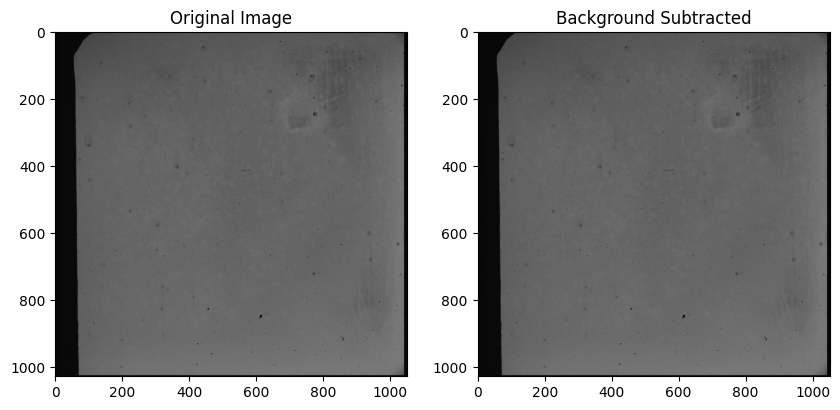

In [14]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(data, vmin=data.min(), vmax=data.max(), cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(background_subtracted, vmin=background_subtracted.min(), vmax=background_subtracted.max(), cmap='gray')
plt.title('Background Subtracted')

plt.show()

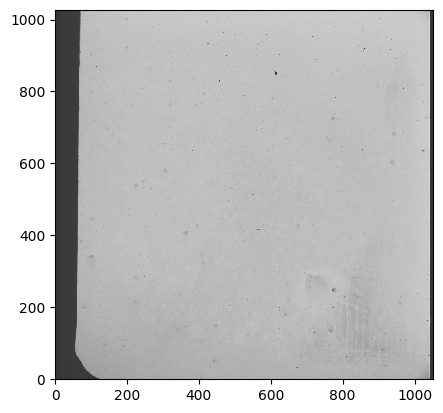

In [36]:
data3 = rotate(data, 0.0)
norm = ImageNormalize(stretch=SqrtStretch())  
plt.imshow(data3, origin='lower', cmap='Greys_r', norm=norm,
           interpolation='nearest')

In [37]:
coverage_mask = (data3 == 0)
bkg3 = Background2D(data3, (15, 15), filter_size=(3, 3),
                    coverage_mask=coverage_mask, fill_value=0.0,
                    exclude_percentile=50.0)

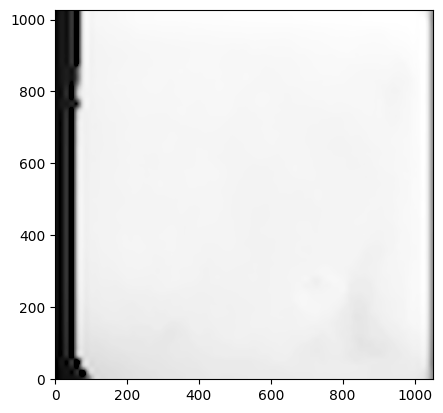

In [38]:
norm = ImageNormalize(stretch=SqrtStretch())  
plt.imshow(bkg3.background, origin='lower', cmap='Greys_r', norm=norm,
           interpolation='nearest') 

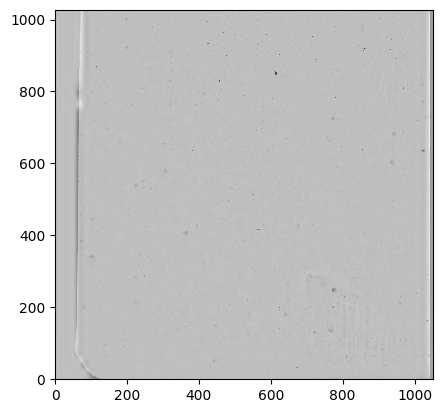

In [39]:
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data3 - bkg3.background, origin='lower', cmap='Greys_r',
           norm=norm, interpolation='nearest')

(0.0, 250.0)

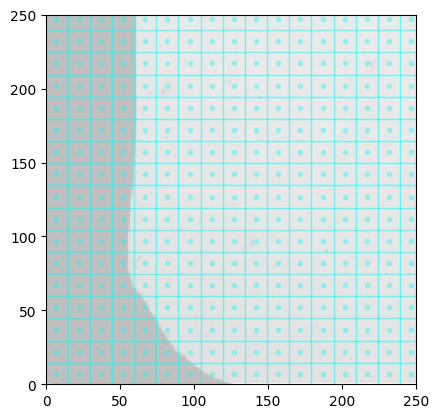

In [40]:
plt.imshow(data3, origin='lower', cmap='Greys_r', norm=norm,
           interpolation='nearest')
bkg3.plot_meshes(outlines=True, marker='.', color='cyan', alpha=0.3)
plt.xlim(0, 250)
plt.ylim(0, 250)